<a href="https://colab.research.google.com/github/amiKaushik/CodeAlpha_Disease_Prediction_from_Medical_Data/blob/main/Disease_Prediction_from_Medical_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Disease Prediction from Medical Data
- Downloads 3 UCI datasets (Heart Disease - Cleveland, Pima Indians Diabetes, Breast Cancer Wisconsin Diagnostic)
- Preprocesses data (missing values, scaling, encoding)
- Trains classifiers: LogisticRegression, SVM (RBF), RandomForest, XGBoost
- Evaluates using cross-validation and hold-out test set; reports accuracy, precision, recall, f1, ROC-AUC
- Saves trained models and a summary CSV of results

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

In [ ]:
def evaluate_model(model, name, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"\n===== {name} =====")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    y_prob = model.predict_proba(X_test)[:,1]
    print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

In [ ]:
def plot_roc_curve(model, X_test, y_test, name):
    """
    Plots the ROC curve for a given model.

    Args:
        model: Trained model.
        X_test: Test features.
        y_test: True labels for the test set.
        name: Name of the model for the plot title.
    """
    plt.figure(figsize=(8, 6))
    RocCurveDisplay.from_estimator(model, X_test, y_test)
    plt.title(f'ROC Curve - {name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.plot([0, 1], [0, 1], 'k--')  # Plot the random guess line
    plt.grid(True)
    plt.show()

# Heart Disease

In [ ]:
heart_df = pd.read_csv('/content/drive/MyDrive/CodeAlpha_ProjectDatasets/Heart_disease_cleveland_new.csv')

In [ ]:
heart_df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


In [ ]:
hX = heart_df.drop('target', axis=1)
hy = heart_df['target']

In [ ]:
scaler = StandardScaler()
hX_scaled = scaler.fit_transform(hX)

In [ ]:
hX_train, hX_test, hy_train, hy_test = train_test_split(
    hX_scaled, hy, test_size=0.2, random_state=42, stratify=hy
)

In [ ]:
lg_model = LogisticRegression(max_iter=1000)
lg_model.fit(hX_train, hy_train)

LogisticRegression(max_iter=1000)

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(hX_train, hy_train)

RandomForestClassifier(random_state=42)

In [ ]:
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(hX_train, hy_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
svm_model = SVC(probability=True, random_state=42) # probability=True is needed for ROC-AUC
svm_model.fit(hX_train, hy_train)

SVC(probability=True, random_state=42)

In [ ]:
evaluate_model(lg_model, "Logistic Regression")
evaluate_model(rf_model, "Random Forest")


===== Logistic Regression =====
Confusion Matrix:
 [[27  6]
 [ 2 26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.82      0.87        33
           1       0.81      0.93      0.87        28

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61

ROC-AUC Score: 0.9534632034632035

===== Random Forest =====
Confusion Matrix:
 [[28  5]
 [ 1 27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.85      0.90        33
           1       0.84      0.96      0.90        28

    accuracy                           0.90        61
   macro avg       0.90      0.91      0.90        61
weighted avg       0.91      0.90      0.90        61

ROC-AUC Score: 0.9512987012987013


In [ ]:
evaluate_model(xgb_model, "XGBoost")
evaluate_model(svm_model, "SVM")


===== XGBoost =====
Confusion Matrix:
 [[26  7]
 [ 2 26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.79      0.85        33
           1       0.79      0.93      0.85        28

    accuracy                           0.85        61
   macro avg       0.86      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61

ROC-AUC Score: 0.9188311688311689

===== SVM =====
Confusion Matrix:
 [[27  6]
 [ 3 25]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.82      0.86        33
           1       0.81      0.89      0.85        28

    accuracy                           0.85        61
   macro avg       0.85      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61

ROC-AUC Score: 0.9475108225108225


<Figure size 800x600 with 0 Axes>

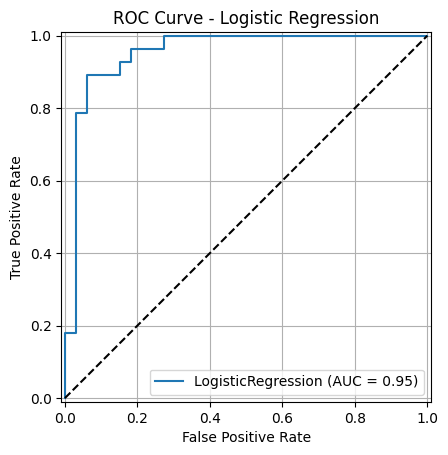

<Figure size 800x600 with 0 Axes>

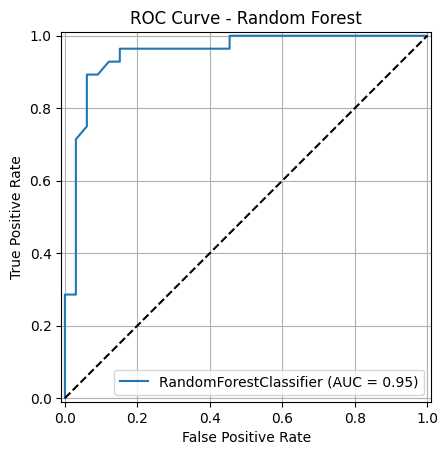

<Figure size 800x600 with 0 Axes>

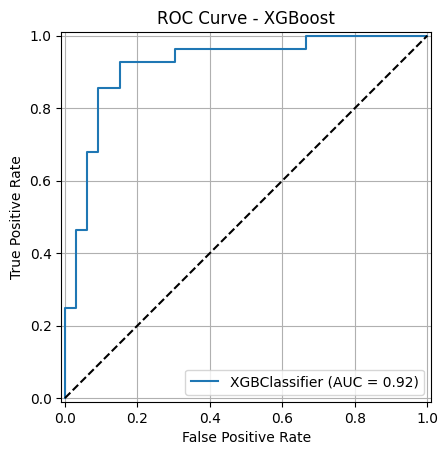

<Figure size 800x600 with 0 Axes>

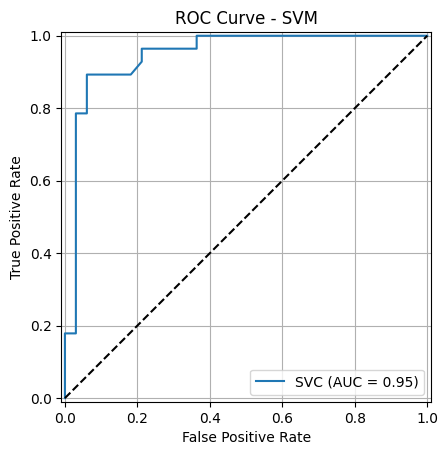

In [ ]:
plot_roc_curve(lg_model, hX_test, hy_test, "Logistic Regression")
plot_roc_curve(rf_model, hX_test, hy_test, "Random Forest")
plot_roc_curve(xgb_model, hX_test, hy_test, "XGBoost")
plot_roc_curve(svm_model, hX_test, hy_test, "SVM")

# Breast Cancer

In [ ]:
!pip install ucimlrepo

In [ ]:
import ucimlrepo


===== Logistic Regression (Breast Cancer) =====
Confusion Matrix:
 [[89  3]
 [ 4 44]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96        92
           1       0.94      0.92      0.93        48

    accuracy                           0.95       140
   macro avg       0.95      0.94      0.94       140
weighted avg       0.95      0.95      0.95       140

ROC-AUC Score: 0.995018115942029

===== Random Forest (Breast Cancer) =====
Confusion Matrix:
 [[88  4]
 [ 2 46]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97        92
           1       0.92      0.96      0.94        48

    accuracy                           0.96       140
   macro avg       0.95      0.96      0.95       140
weighted avg       0.96      0.96      0.96       140

ROC-AUC Score: 0.9887907608695652

===== XGBoost (Breast Cancer) =====
Confusion Matrix:
 [[88  4

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:52:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


<Figure size 800x600 with 0 Axes>

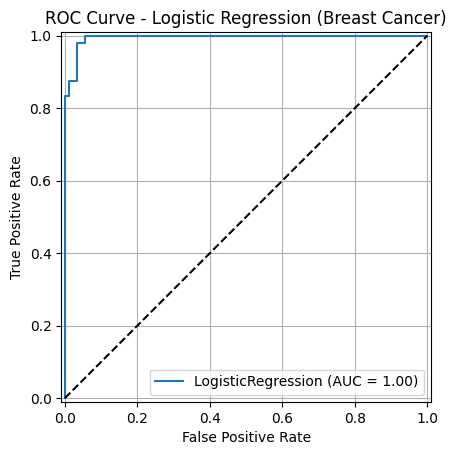

<Figure size 800x600 with 0 Axes>

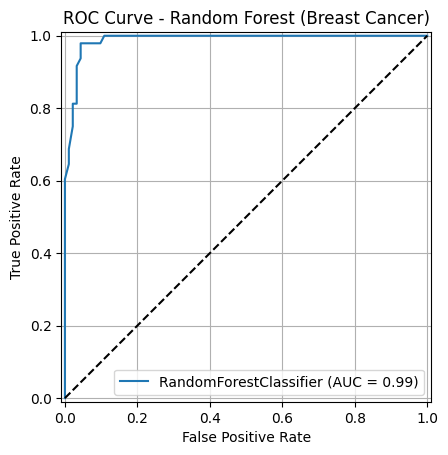

<Figure size 800x600 with 0 Axes>

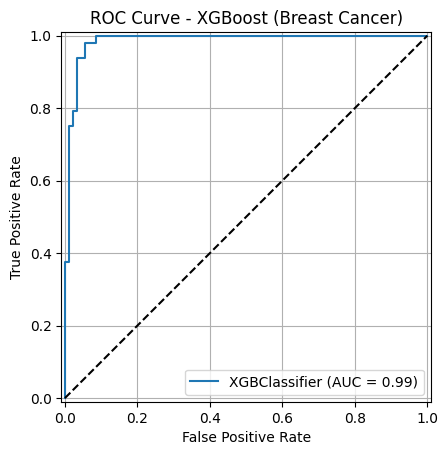

<Figure size 800x600 with 0 Axes>

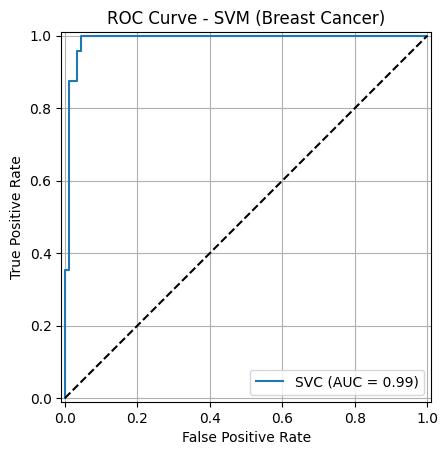

In [ ]:

from sklearn.impute import SimpleImputer
import ucimlrepo

# fetch dataset
bc_repo = ucimlrepo.fetch_ucirepo(id=15)

# data (as pandas dataframes)
bcX = bc_repo.data.features
bcy = bc_repo.data.targets.squeeze()

# Encode target: 2=0, 4=1
bcy = bcy.replace({2: 0, 4: 1})

# Drop rows with missing target
mask = bcy.notna()
bcX = bcX.loc[mask]
bcy = bcy.loc[mask]

# Handle missing feature values
imputer = SimpleImputer(strategy='most_frequent')
bcX_imputed = imputer.fit_transform(bcX)

# Scale features
scaler = StandardScaler()
bcX_scaled = scaler.fit_transform(bcX_imputed)

# Train-test split
bcX_train, bcX_test, bcy_train, bcy_test = train_test_split(
    bcX_scaled, bcy, test_size=0.2, random_state=42, stratify=bcy
)

# -----------------------
# Train models
# -----------------------
bc_lg = LogisticRegression(max_iter=1000)
bc_lg.fit(bcX_train, bcy_train)

bc_rf = RandomForestClassifier(n_estimators=100, random_state=42)
bc_rf.fit(bcX_train, bcy_train)

bc_xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss")
bc_xgb.fit(bcX_train, bcy_train)

bc_svm = SVC(probability=True, random_state=42)
bc_svm.fit(bcX_train, bcy_train)

# -----------------------
# Evaluate
# -----------------------
evaluate_model(bc_lg, "Logistic Regression (Breast Cancer)", bcX_test, bcy_test)
evaluate_model(bc_rf, "Random Forest (Breast Cancer)", bcX_test, bcy_test)
evaluate_model(bc_xgb, "XGBoost (Breast Cancer)", bcX_test, bcy_test)
evaluate_model(bc_svm, "SVM (Breast Cancer)", bcX_test, bcy_test)

# -----------------------
# ROC Curves
# -----------------------
plot_roc_curve(bc_lg, bcX_test, bcy_test, "Logistic Regression (Breast Cancer)")
plot_roc_curve(bc_rf, bcX_test, bcy_test, "Random Forest (Breast Cancer)")
plot_roc_curve(bc_xgb, bcX_test, bcy_test, "XGBoost (Breast Cancer)")
plot_roc_curve(bc_svm, bcX_test, bcy_test, "SVM (Breast Cancer)")

# Diabaetes

In [ ]:
ddf = pd.read_csv('/content/drive/MyDrive/CodeAlpha_ProjectDatasets/diabetes.csv')

In [ ]:
ddf.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
ddf.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
dX = ddf.drop("Outcome", axis=1)
dy = ddf["Outcome"]

In [ ]:

import numpy as np
cols_with_zeros = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
dX[cols_with_zeros] = dX[cols_with_zeros].replace(0, np.nan)

In [ ]:
imputer = SimpleImputer(strategy="median")
dX_imputed = imputer.fit_transform(dX)

In [ ]:
scaler = StandardScaler()
dX_scaled = scaler.fit_transform(dX_imputed)

In [ ]:
# Train-test split
dX_train, dX_test, dy_train, dy_test = train_test_split(
    dX_scaled, dy, test_size=0.2, random_state=42, stratify=dy
)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [11:18:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [11:18:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



===== Logistic Regression =====
Confusion Matrix:
 [[75 25]
 [16 38]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.75      0.79       100
           1       0.60      0.70      0.65        54

    accuracy                           0.73       154
   macro avg       0.71      0.73      0.72       154
weighted avg       0.75      0.73      0.74       154

ROC-AUC Score: 0.8125925925925926


<Figure size 700x500 with 0 Axes>

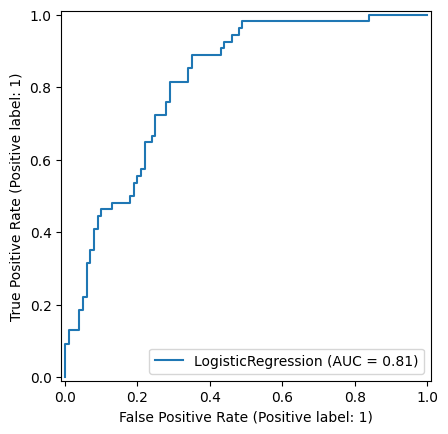

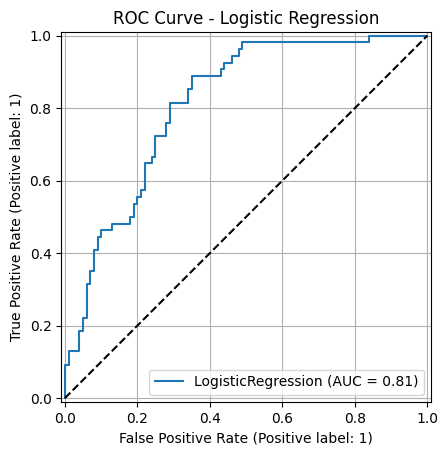


===== Random Forest =====
Confusion Matrix:
 [[73 27]
 [16 38]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.73      0.77       100
           1       0.58      0.70      0.64        54

    accuracy                           0.72       154
   macro avg       0.70      0.72      0.71       154
weighted avg       0.74      0.72      0.73       154

ROC-AUC Score: 0.8177777777777778


<Figure size 700x500 with 0 Axes>

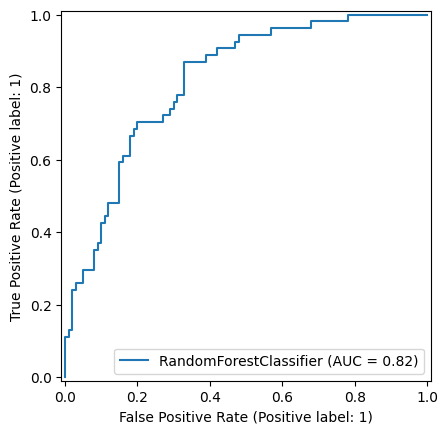

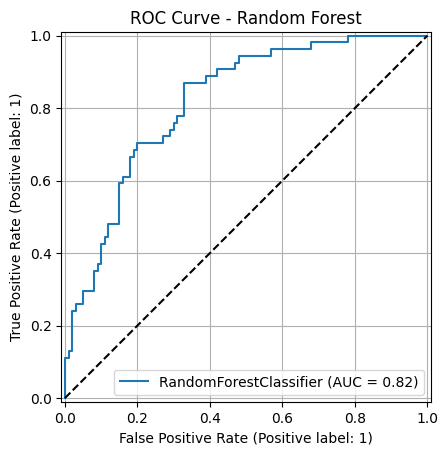


===== XGBoost =====
Confusion Matrix:
 [[80 20]
 [19 35]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.80       100
           1       0.64      0.65      0.64        54

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154

ROC-AUC Score: 0.8162962962962963


<Figure size 700x500 with 0 Axes>

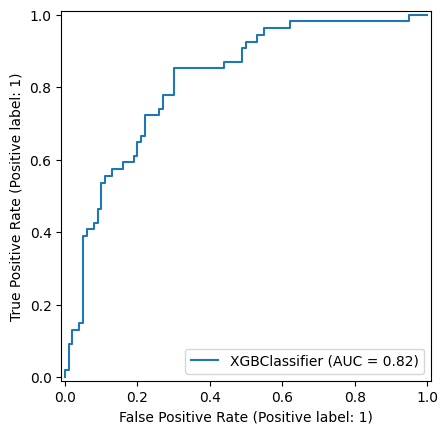

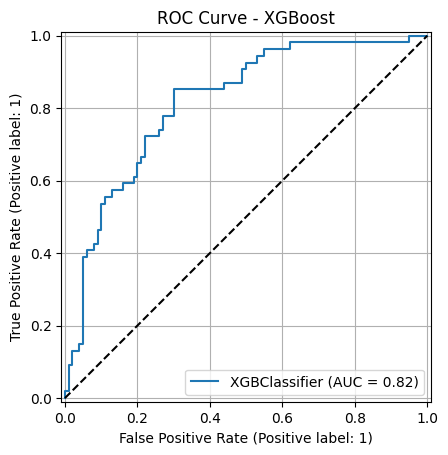


===== SVM =====
Confusion Matrix:
 [[78 22]
 [15 39]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.78      0.81       100
           1       0.64      0.72      0.68        54

    accuracy                           0.76       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.77      0.76      0.76       154

ROC-AUC Score: 0.8098148148148149


<Figure size 700x500 with 0 Axes>

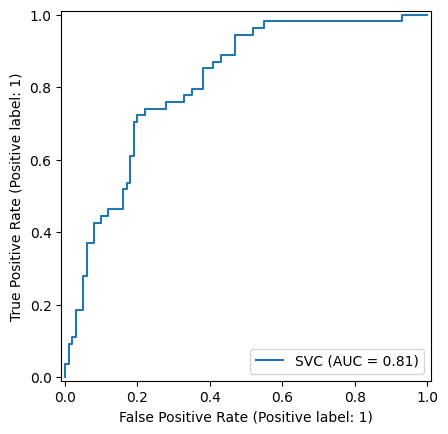

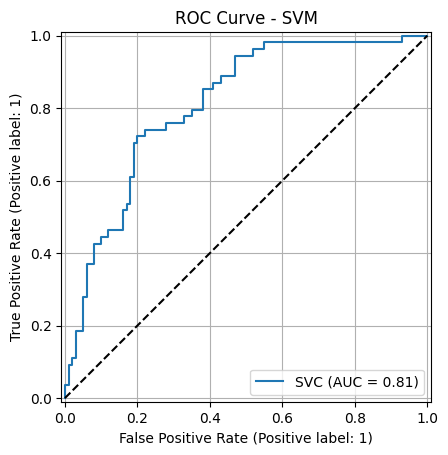


===== Ensemble (Voting) =====
Confusion Matrix:
 [[77 23]
 [17 37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.77      0.79       100
           1       0.62      0.69      0.65        54

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.74      0.74       154

ROC-AUC Score: 0.8261111111111111


<Figure size 700x500 with 0 Axes>

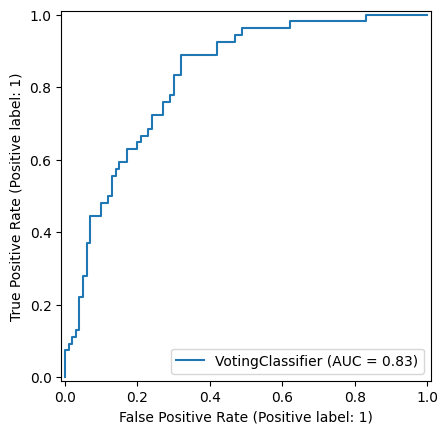

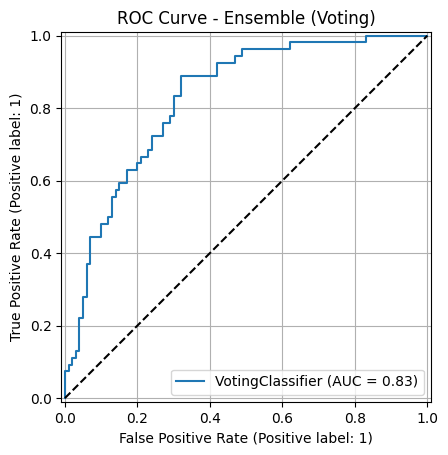

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CodeAlpha_ProjectDatasets/diabetes.csv')
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Replace zeros in medically invalid columns with np.nan
cols_with_zeros = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
X[cols_with_zeros] = X[cols_with_zeros].replace(0, np.nan)

# Impute missing values
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# -----------------------
# Compute class weight for XGBoost
# -----------------------
counter = Counter(y_train)
scale_pos_weight = counter[0] / counter[1]

# -----------------------
# Train tuned models with class weighting
# -----------------------
lg = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
    C=1.0,
    solver="liblinear"
)
lg.fit(X_train, y_train)

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=6,
    min_samples_split=5,
    min_samples_leaf=3,
    random_state=42,
    class_weight="balanced"
)
rf.fit(X_train, y_train)

xgb = XGBClassifier(
    n_estimators=300,
    max_depth=4,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)
xgb.fit(X_train, y_train)

svm = SVC(
    probability=True,
    random_state=42,
    class_weight="balanced",
    C=10,
    gamma=0.1
)
svm.fit(X_train, y_train)

# -----------------------
# Ensemble: soft voting
# -----------------------
ensemble = VotingClassifier(
    estimators=[('lr', lg), ('rf', rf), ('xgb', xgb)],
    voting='soft'
)
ensemble.fit(X_train, y_train)

# -----------------------
# Evaluate all models
# -----------------------
models = [
    (lg, "Logistic Regression"),
    (rf, "Random Forest"),
    (xgb, "XGBoost"),
    (svm, "SVM"),
    (ensemble, "Ensemble (Voting)")
]

for model, name in models:
    evaluate_model(model, name, X_test, y_test)
    plot_roc_curve(model, X_test, y_test, name)